<a href="https://colab.research.google.com/github/sarahmagdi/ITI_DL/blob/main/DLAssignment3_2Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

In [2]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio

In [3]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
trainX.shape

(50000, 32, 32, 3)

In [5]:
testX.shape

(10000, 32, 32, 3)

In [6]:
#labels
np.unique(trainy)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
'''
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

'\n0: airplane\n1: automobile\n2: bird\n3: cat\n4: deer\n5: dog\n6: frog\n7: horse\n8: ship\n9: truck\n'

In [8]:
# one hot encode for target values so we can use it in training when we calculate loss function
from tensorflow.keras.utils import to_categorical
trainy = to_categorical(trainy)
testy = to_categorical(testy)

In [9]:
trainy.shape

(50000, 10)

In [10]:
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX  / 255.0
testX = testX  / 255.0

In [11]:
#spliting data to tune hyperparameter
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split( trainX, trainy, test_size=0.02, random_state=42)

In [12]:
X_train.shape

(49000, 32, 32, 3)

In [23]:
#from tensorflow.keras.applications.vgg16 import VGG
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input

In [24]:
from tensorflow import keras

In [32]:
pretrained_box = keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(32, 32, 3))
pretrained_box.trainable = False

In [33]:
pretrained_box.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

1-Data Augmentation:

In [28]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
      rotation_range=24, 
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
X_train_aug = train_datagen.flow(X_train, y_train, batch_size=32)
X_validation_aug = test_datagen.flow(X_validation, y_validation, batch_size=32)

In [29]:
from keras import models
from keras import layers

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization


2-TL

In [35]:
from keras import regularizers
network = models.Sequential()
network.add(pretrained_box)
network.add(Flatten())
network.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001) ,name='Layer_2'))
network.add(Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

In [36]:
import keras
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
network.compile(optimizer=opt,
loss='categorical_crossentropy',
metrics=['accuracy'])

In [60]:
X_train.shape[0]

49000

In [61]:
X_train.shape[0] // 32

1531

In [59]:
len(X_train_aug)

1532

In [40]:
history = network.fit_generator(X_train_aug,
                              steps_per_epoch=X_train.shape[0] // 32,
                              epochs=10,
                              validation_data=X_validation_aug,
                              validation_steps=X_validation.shape[0] // 32)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


1531/1531 [==============================] - 510s 333ms/step - loss: 2.2756 - accuracy: 0.1295 - val_loss: 2.2086 - val_accuracy: 0.1956
Epoch 2/10
1531/1531 [==============================] - 517s 338ms/step - loss: 2.2767 - accuracy: 0.1346 - val_loss: 2.2151 - val_accuracy: 0.1583
Epoch 3/10
1531/1531 [==============================] - 498s 325ms/step - loss: 2.2659 - accuracy: 0.1380 - val_loss: 2.2056 - val_accuracy: 0.1925
Epoch 4/10
1531/1531 [==============================] - 496s 324ms/step - loss: 2.2571 - accuracy: 0.1445 - val_loss: 2.1668 - val_accuracy: 0.2087
Epoch 5/10
1531/1531 [==============================] - 498s 325ms/step - loss: 2.2515 - accuracy: 0.1495 - val_loss: 2.1523 - val_accuracy: 0.2228
Epoch 6/10
1531/1531 [==============================] - 500s 327ms/step - loss: 2.2469 - accuracy: 0.1496 - val_loss: 2.1900 - val_accuracy: 0.2117
Epoch 7/10
1531/1531 [==============================] - 499s 326ms/step - loss: 2.2414 - accuracy: 0.1547 - val_loss: 2.154

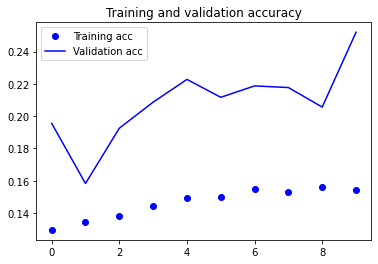

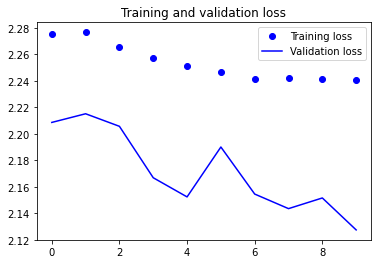

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

3-Visualize layers

In [42]:
from keras.utils.vis_utils import plot_model

In [43]:
layer_outputs = [layer.output for layer in pretrained_box.layers]
activation_model = tensorflow.keras.models.Model(inputs=pretrained_box.input, outputs=layer_outputs)

In [44]:
activations = activation_model.predict(testX[0].reshape(1, 32, 32, 3))

In [45]:
len(activations)

19

In [46]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 32, 32, 3)


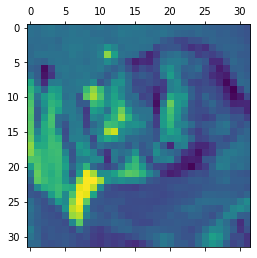

In [48]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

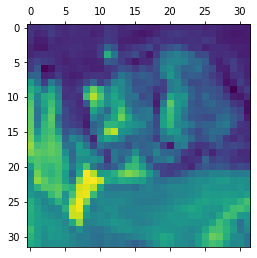

In [49]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

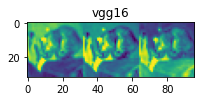

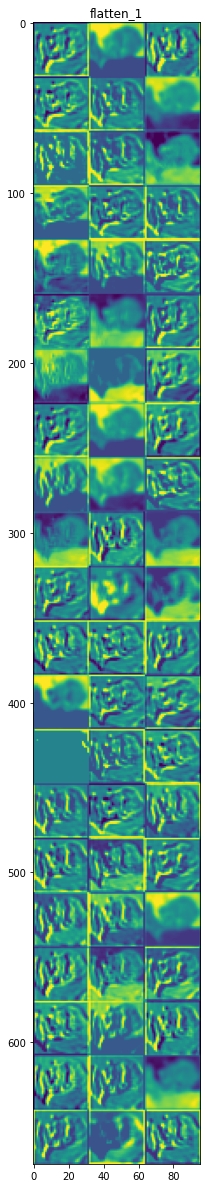

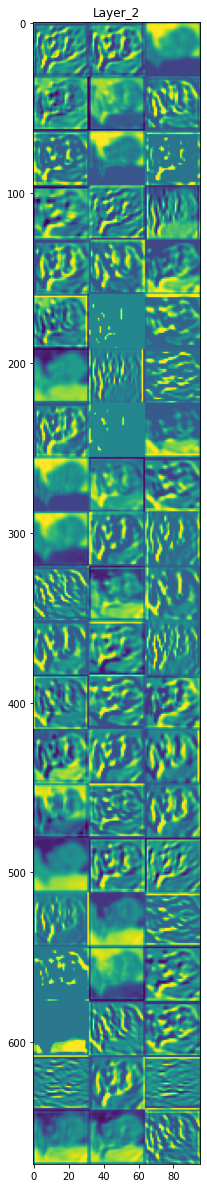

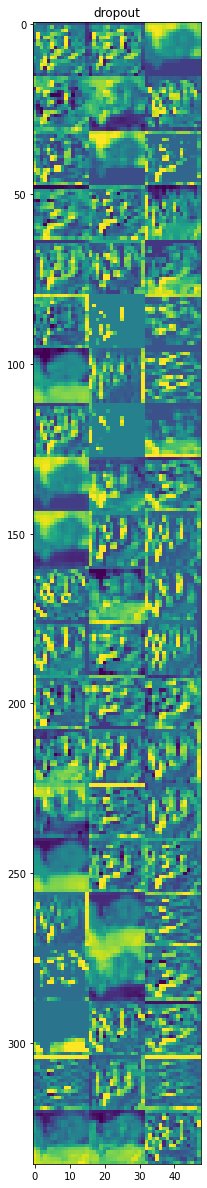

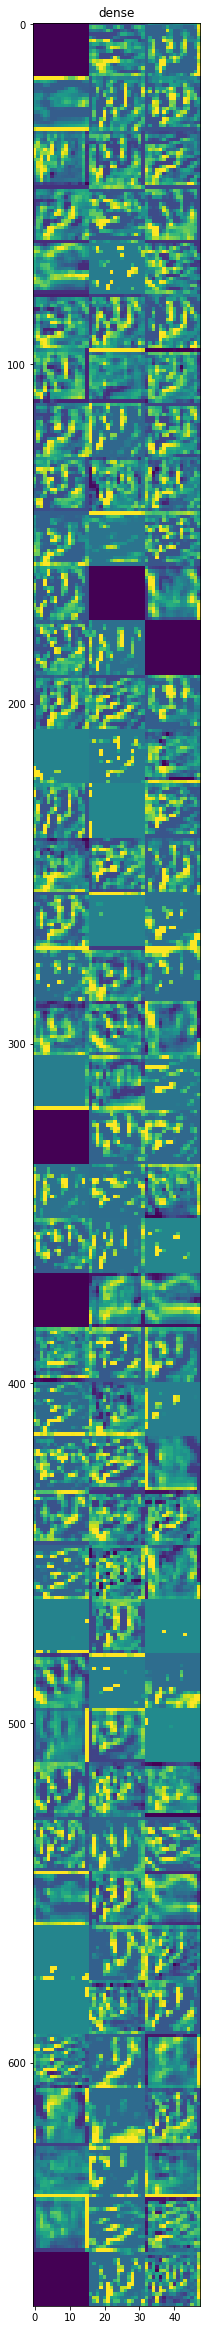

In [58]:
layer_names = []
for layer in network.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 3

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale *display_grid.shape[1],
                         scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()